## Reading & Loading Images

In [2]:
import cv2
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/sample1.jpg")

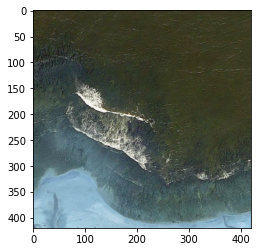

In [7]:
plt.imshow(img)

## Image Shape

In [8]:
img.shape

(420, 420, 3)

In [9]:
(r, g, b) = cv2.split(img)

In [10]:
r.shape

(420, 420)

In [11]:
b.shape

(420, 420)

In [12]:
b

array([[ 42,  42,  32, ...,  34,  27,  39],
       [ 34,  34,  46, ...,  37,  40,  47],
       [ 33,  26,  32, ...,  31,  40,  30],
       ...,
       [196, 215, 204, ..., 218, 216, 214],
       [201, 195, 184, ..., 213, 215, 218],
       [192, 157, 149, ..., 217, 219, 216]], dtype=uint8)

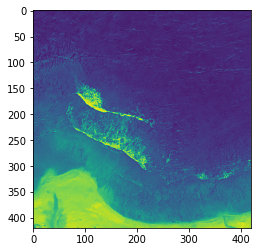

In [13]:
plt.imshow(b)

## Upload and Unzipping

In [14]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [23]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer.zip" -d "/content/drive/MyDrive/Colab Notebooks"

Archive:  /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer.zip
replace /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/dataloader.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/dataloader.py  
replace /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer/saved_model.pb  
replace /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer/variables/variables.data-00000-of-00001  
replace /content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer/variables/variables.index? [y]es, [n]o, [A]ll, [

In [26]:
pip install utils

## Importing Required Libraries

In [27]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import utils

In [68]:
# size of image on which model was trained
# we need to resize all the images to this size

IMAGE_DIMENSION =(128, 128) 

## Loading Trained Autoencoder

In [69]:
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/model/colorizer')

In [70]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 65536)             369664    
_________________________________________________________________
decoder (Functional)         (None, 128, 128, 2)       960066    
Total params: 1,329,730
Trainable params: 1,329,730
Non-trainable params: 0
_________________________________________________________________


## Testing on Images

In [71]:
test_image_dir = '/content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/test_images'
testing_files = os.listdir(test_image_dir)
print('FOUND {} IMAGES'.format(len(testing_files)))

FOUND 4 IMAGES


In [72]:
CHOSEN_IMAGE_INDEX = 3
print('Testing on ', testing_files[CHOSEN_IMAGE_INDEX])
image_file_name = testing_files[CHOSEN_IMAGE_INDEX]

Testing on  sample4.jpg


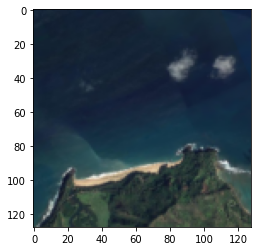

In [73]:
# reading image
image = imread('/content/drive/MyDrive/Colab Notebooks/Satellite Image Colorizer/test_images/sample3.jpg')

# some images have 4 channels for transparency (like png images), discarding 4th channel
image = image[:,:,:3]

# resizing image to required dimension
image = resize(image, IMAGE_DIMENSION)

# plotting image
plt.imshow(image)

## RGB to LAB

As we have color image, so we will be first converting to LAB
L - Lightness (Black and White)
A, B - Color

We will pass L to autoencoder which will predict A', and B'. To get full RGB image we will convert LA'B' to RGB

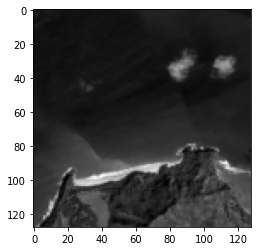

In [74]:
# converting to lab color 
l, ab = RGB2L_AB(image, IMAGE_DIMENSION)

# plotting l channel (black and white)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')

## Predicting color from grayscale image (L)

In [75]:
# predicting color of black and white image

predicted_ab = autoencoder.predict(np.expand_dims(l, axis=0))

## Converting LA'B' to RGB

In [76]:
# converting LA'B' to RGB

colorized_image = L_AB2RGB(l, predicted_ab[0], IMAGE_DIMENSION)
print("FInal color image shape ",colorized_image.shape)

FInal color image shape  (128, 128, 3)


## Result Comparision

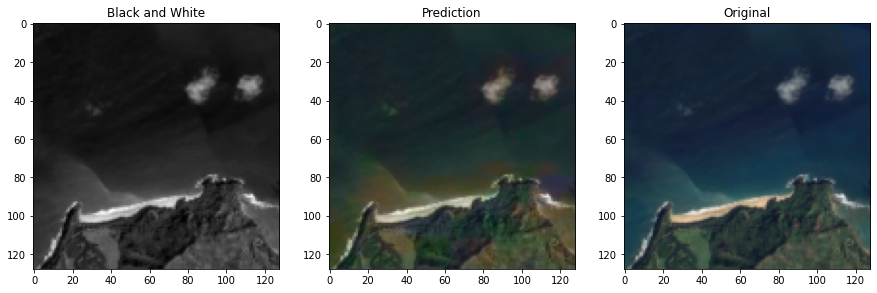

In [77]:
# plotting all images

plt.figure(figsize=(15,18))
plt.subplot(1,3,1)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')
plt.title('Black and White')

plt.subplot(1,3,2)
plt.imshow(colorized_image)
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(image)
plt.title('Original')

plt.show()